# Football Player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/datasets/javagarm/fifa-19-complete-player-dataset. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).

Data for each instance (observation) consists of a football player skills to estimate his overall quality.

The original raw dataset contains 18,207 instances. It is cleaned, preprocessed, and prepared in this notebook. After this phase of data preparation, a final dataset of 16,134 instances is obtained with 22 input attributes. The file FootballPlayerPreparedCleanAttributes.csv contains the resulting dataset.

From this data, the classification problem consists of estimating the overall quality of a football player within four possible one-hot encoded classes: *poor*, *intermediate*, *good*, and *excellent*. The resulting file is FootballPlayerOneHotEncodedClasses.csv.

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

In [8]:
INPUT_FILE_NAME = "FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "FootballPlayerOneHotEncodedClasses.csv"

In [10]:
dataset = pd.read_csv(INPUT_FILE_NAME, encoding='ISO-8859-1')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18206 non-null  float64
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18206 non-null  float64
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Remove unnecesary columns to estimate the overall quality of a football player

In [15]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Potential':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

Then, we remove the goal keepers and the attribute *position*.

In [18]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)
dataset.drop(['Position'], inplace=True, axis = 1)

In [20]:
dataset[:10]

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90.0,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [22]:
dataset[-10:]

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,47.0,31.0,28.0,40.0,53.0,31.0,46.0,39.0,37.0,48.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,47.0,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,52.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,47.0,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,55.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,47.0,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,30.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,47.0,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,27.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,47.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,46.0,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


Find out whether or not there are missing values and, in such case, remove the corresponding rows.

In [25]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48}

In [27]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [29]:
dataset.shape

(16134, 30)

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously.

In [32]:
dataset.corr()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496814,0.373000,0.467296,0.722615,0.452038,0.516518,0.503084,0.455811,0.585374,...,0.502207,0.453405,0.333576,0.438786,0.524665,0.390954,0.801772,0.305991,0.264510,0.224896
Crossing,0.496814,1.000000,0.413462,-0.134011,0.632453,0.472682,0.712405,0.714711,0.618401,0.593150,...,0.548441,0.106196,0.126397,0.585804,0.643929,0.371322,0.469816,0.087405,0.086018,0.079525
Finishing,0.373000,0.413462,1.000000,0.002567,0.398874,0.814657,0.706618,0.614067,0.537315,0.219267,...,0.803036,-0.201234,-0.491542,0.818930,0.655207,0.744725,0.412127,-0.502819,-0.558251,-0.585487
HeadingAccuracy,0.467296,-0.134011,0.002567,1.000000,0.133102,0.062764,-0.133264,-0.090895,-0.075865,0.058164,...,0.030549,0.459092,0.287207,-0.023220,-0.078204,0.109100,0.345011,0.274660,0.257840,0.235461
ShortPassing,0.722615,0.632453,0.398874,0.133102,1.000000,0.469234,0.639299,0.614829,0.584244,0.842536,...,0.575076,0.305887,0.287177,0.501885,0.724475,0.384571,0.672974,0.244910,0.235413,0.203473
Volleys,0.452038,0.472682,0.814657,0.062764,0.469234,1.000000,0.674653,0.691808,0.618030,0.314465,...,0.786839,-0.064104,-0.334318,0.745874,0.659229,0.729763,0.504114,-0.356856,-0.401851,-0.429694
Dribbling,0.516518,0.712405,0.706618,-0.133264,0.639299,0.674653,1.000000,0.731785,0.599367,0.495177,...,0.724237,-0.058871,-0.189714,0.789104,0.758932,0.565620,0.509281,-0.213818,-0.243964,-0.257225
Curve,0.503084,0.714711,0.614067,-0.090895,0.614829,0.691808,0.731785,1.000000,0.789002,0.540160,...,0.730785,0.035835,-0.068503,0.674018,0.727536,0.593325,0.540527,-0.107764,-0.127750,-0.147096
FKAccuracy,0.455811,0.618401,0.537315,-0.075865,0.584244,0.618030,0.599367,0.789002,1.000000,0.554366,...,0.695762,0.075470,0.001813,0.561950,0.683202,0.589953,0.498850,-0.047587,-0.055915,-0.080896
LongPassing,0.585374,0.593150,0.219267,0.058164,0.842536,0.314465,0.495177,0.540160,0.554366,1.000000,...,0.461416,0.349174,0.425576,0.326192,0.652167,0.238079,0.577883,0.369920,0.384723,0.360870


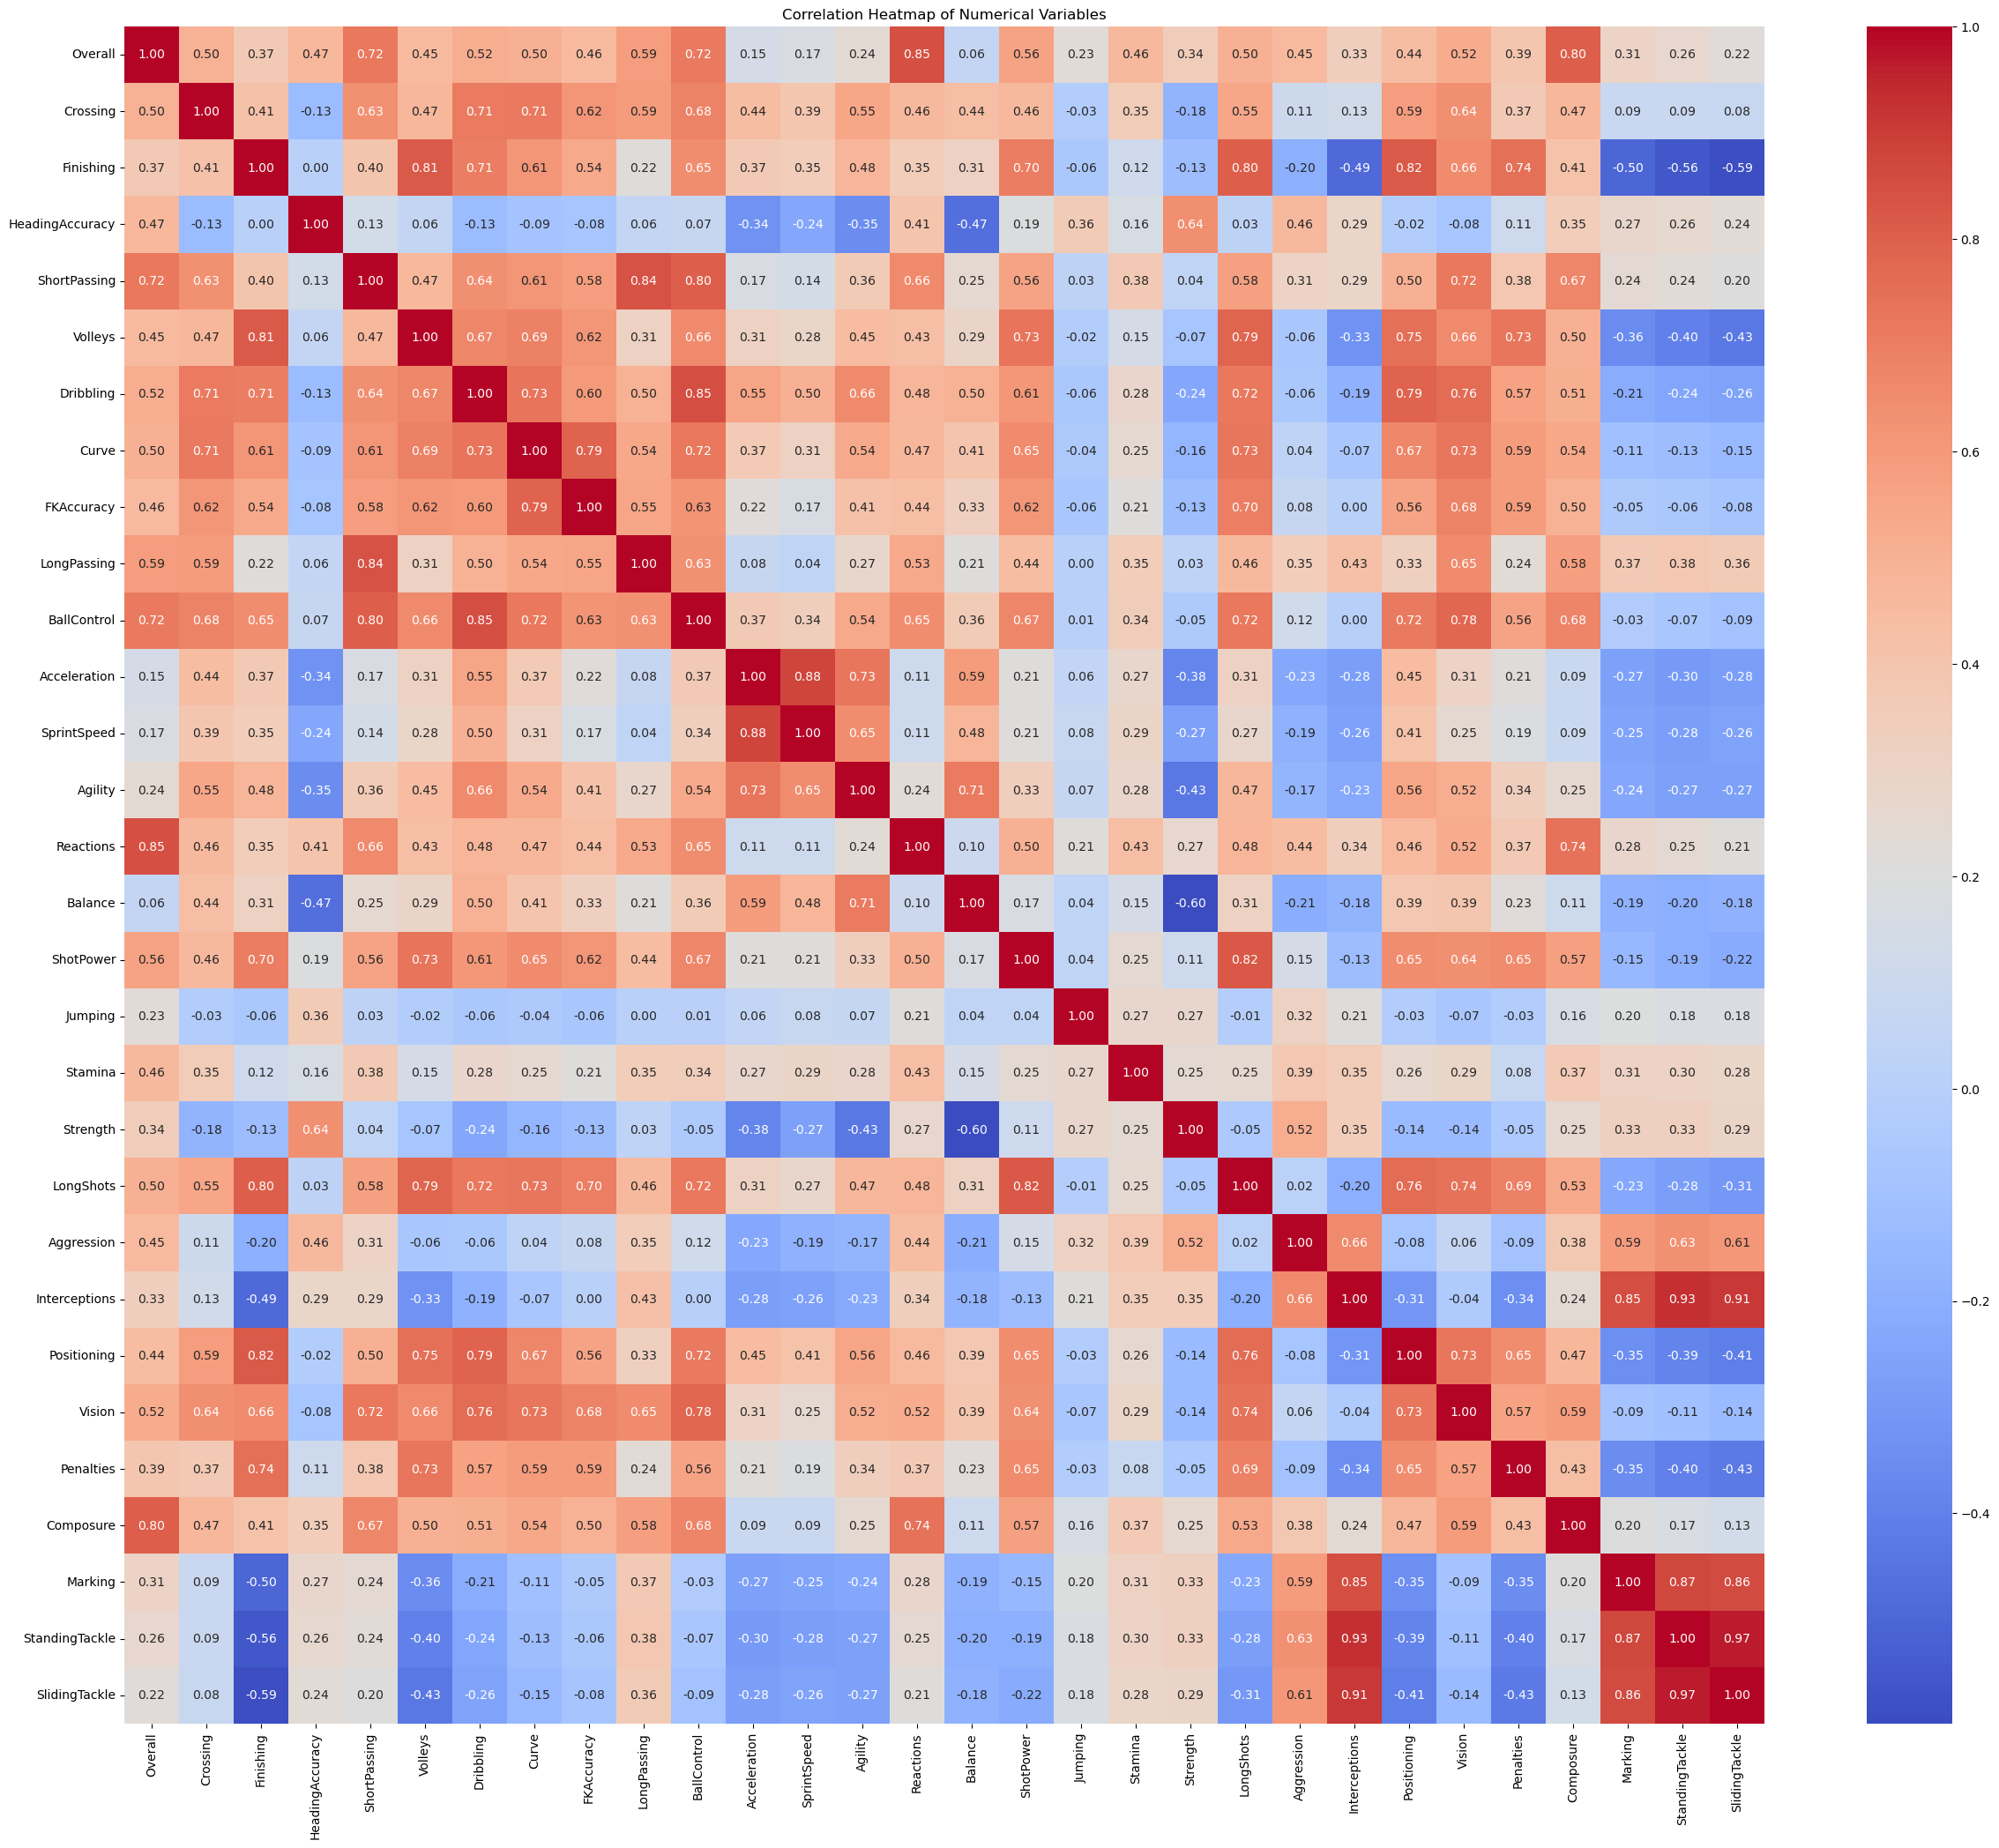

In [34]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

We remove those attributes with a correlation value less than 0.3, assuming that they do not excessively influence the overall value.

In [37]:
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['StandingTackle'], inplace=True, axis = 1)
dataset.drop(['SlidingTackle'], inplace=True, axis = 1)

In [39]:
dataset.shape

(16134, 23)

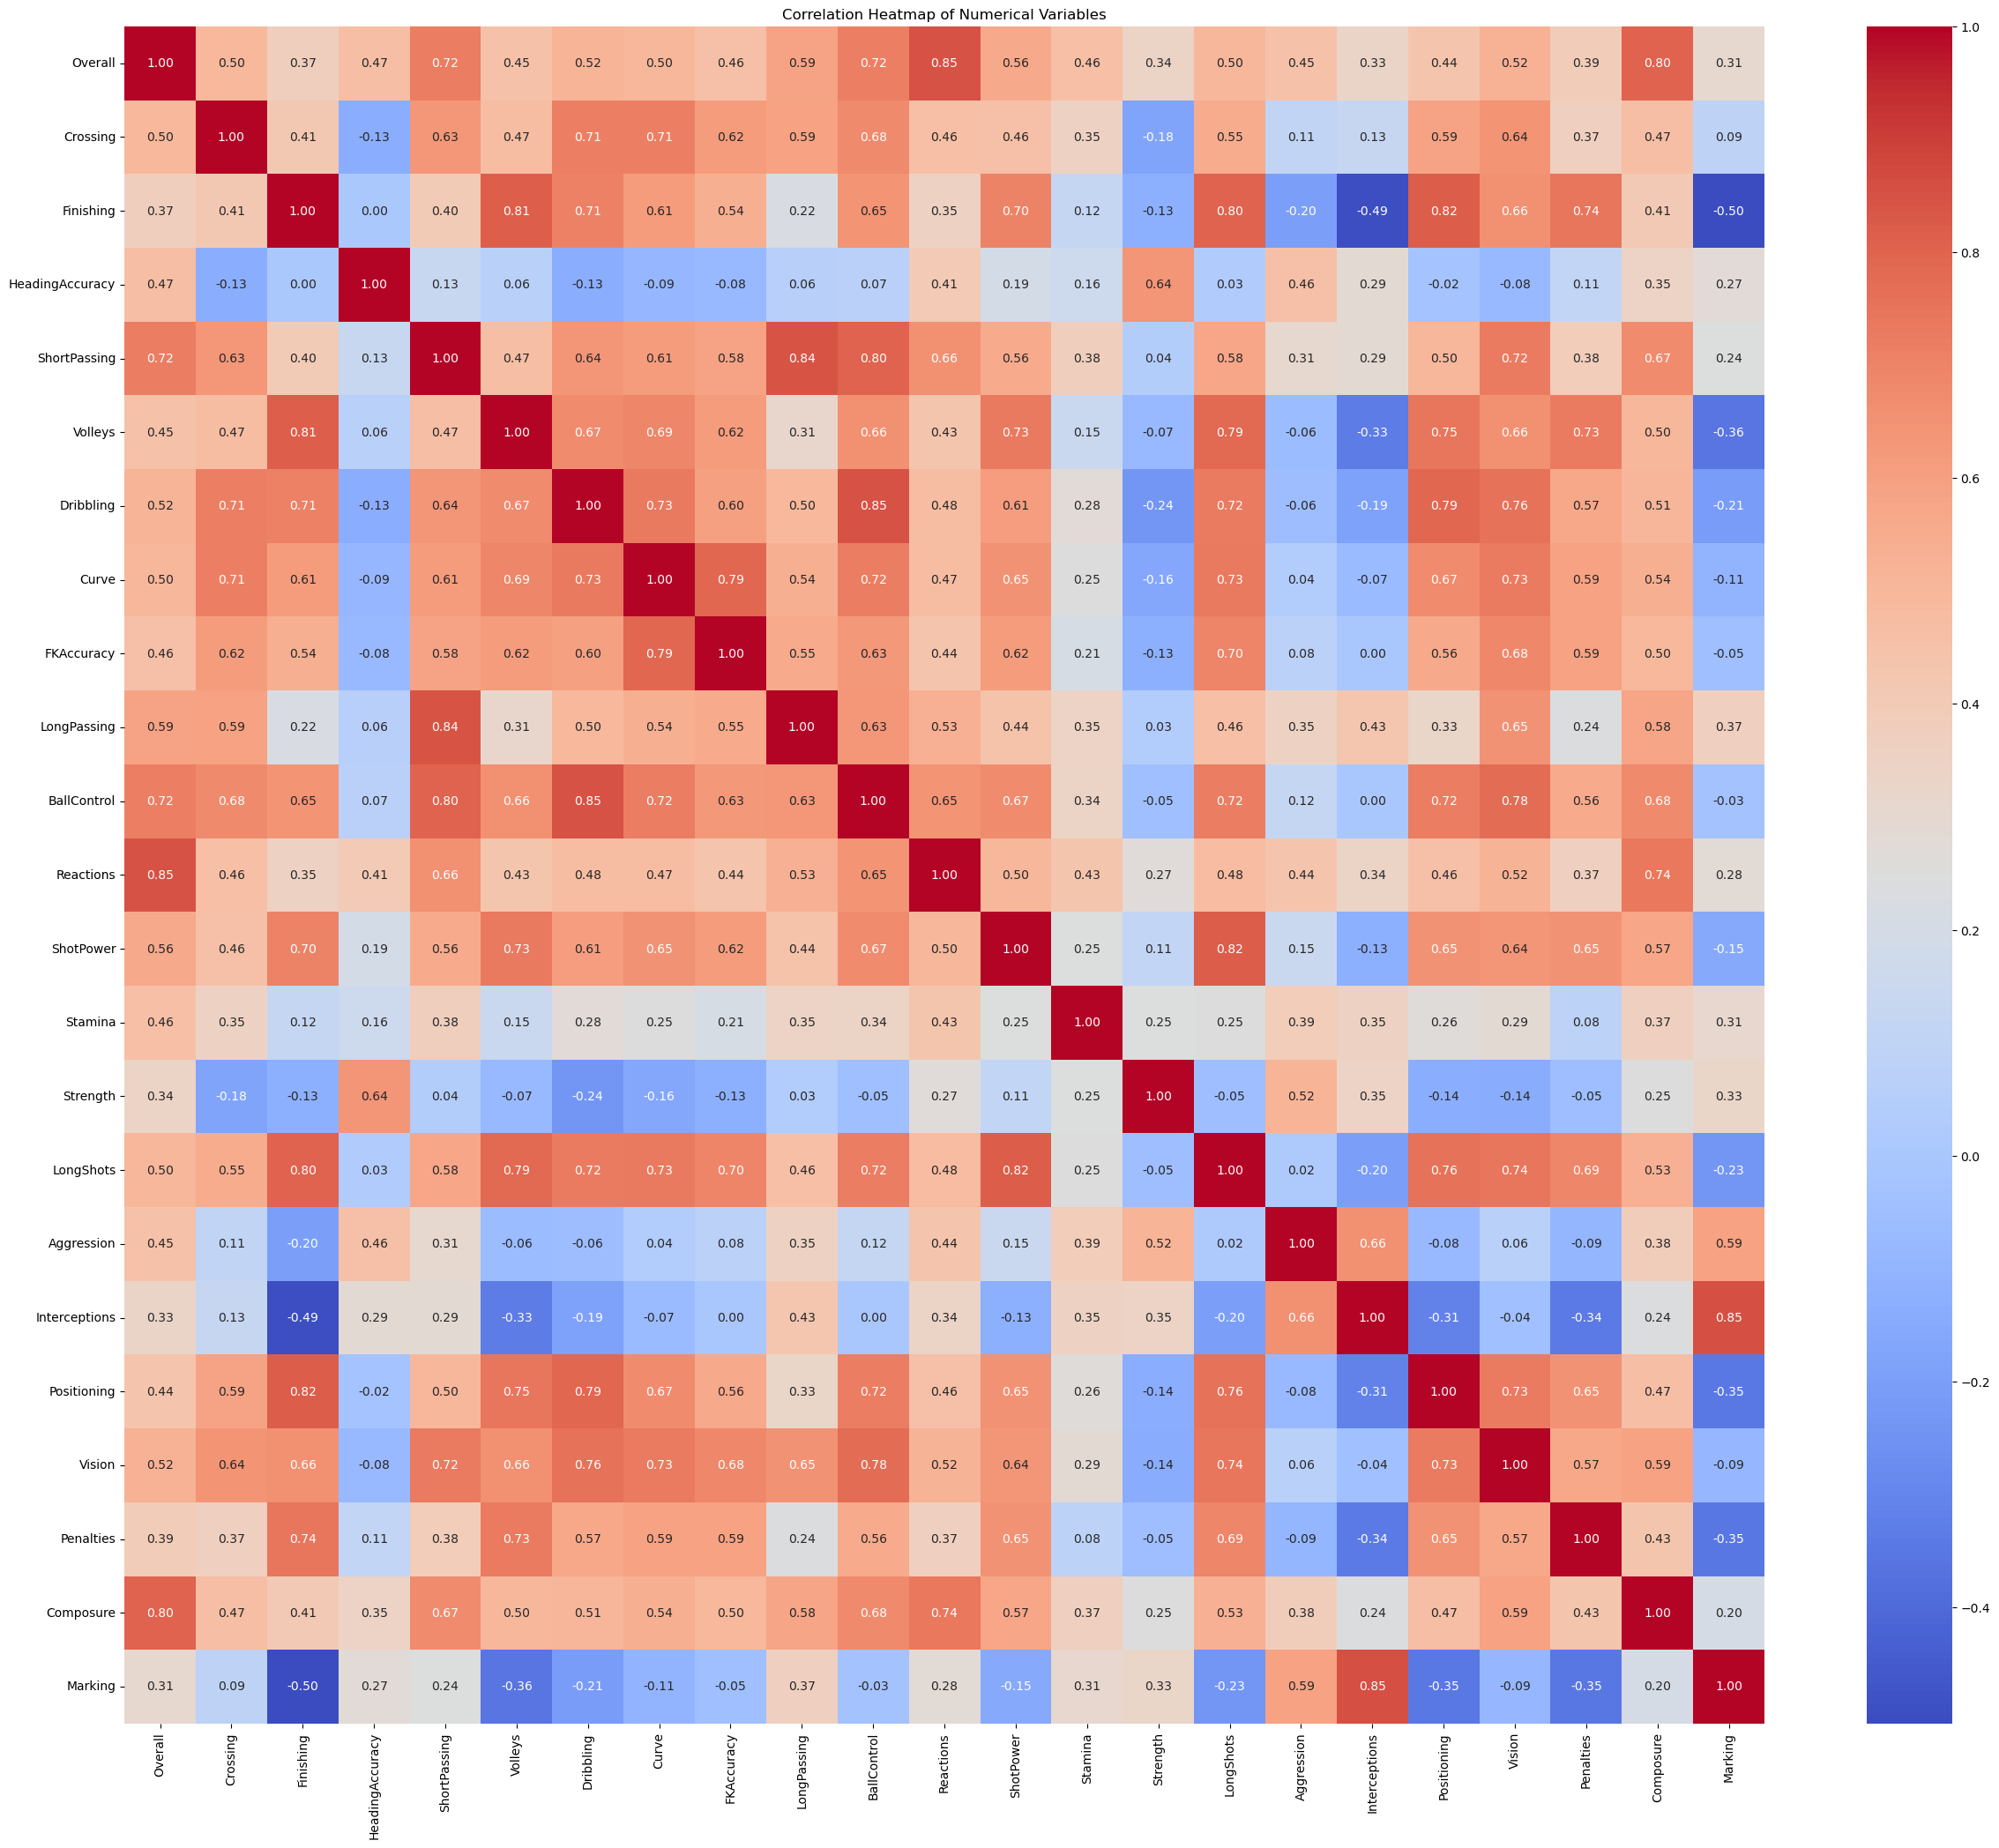

In [41]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Shuffle the dataset (once should be enough but...).

In [44]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,70.0,54.0,52.0,68.0,73.0,45.0,63.0,49.0,33.0,69.0,...,69.0,76.0,50.0,75.0,66.0,57.0,64.0,51.0,67.0,66.0
1,73.0,56.0,44.0,76.0,66.0,42.0,59.0,39.0,37.0,68.0,...,71.0,82.0,48.0,76.0,70.0,44.0,44.0,60.0,60.0,72.0
2,78.0,68.0,68.0,70.0,83.0,67.0,78.0,65.0,64.0,78.0,...,69.0,70.0,74.0,64.0,66.0,76.0,76.0,58.0,70.0,70.0
3,69.0,37.0,72.0,72.0,56.0,65.0,65.0,52.0,39.0,37.0,...,68.0,76.0,55.0,29.0,10.0,72.0,40.0,67.0,60.0,21.0
4,66.0,46.0,46.0,55.0,68.0,41.0,65.0,50.0,44.0,67.0,...,65.0,63.0,44.0,61.0,66.0,64.0,64.0,46.0,58.0,63.0


The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [47]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [49]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Overall,Quality,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,70.0,2,54.0,52.0,68.0,73.0,45.0,63.0,49.0,33.0,...,69.0,76.0,50.0,75.0,66.0,57.0,64.0,51.0,67.0,66.0
1,73.0,3,56.0,44.0,76.0,66.0,42.0,59.0,39.0,37.0,...,71.0,82.0,48.0,76.0,70.0,44.0,44.0,60.0,60.0,72.0
2,78.0,3,68.0,68.0,70.0,83.0,67.0,78.0,65.0,64.0,...,69.0,70.0,74.0,64.0,66.0,76.0,76.0,58.0,70.0,70.0
3,69.0,2,37.0,72.0,72.0,56.0,65.0,65.0,52.0,39.0,...,68.0,76.0,55.0,29.0,10.0,72.0,40.0,67.0,60.0,21.0
4,66.0,1,46.0,46.0,55.0,68.0,41.0,65.0,50.0,44.0,...,65.0,63.0,44.0,61.0,66.0,64.0,64.0,46.0,58.0,63.0
5,57.0,0,55.0,31.0,53.0,55.0,28.0,61.0,35.0,34.0,...,68.0,56.0,42.0,54.0,62.0,59.0,46.0,45.0,45.0,60.0
6,67.0,2,55.0,67.0,79.0,59.0,64.0,54.0,54.0,53.0,...,61.0,92.0,60.0,59.0,30.0,68.0,46.0,66.0,64.0,28.0
7,54.0,0,36.0,29.0,52.0,49.0,33.0,48.0,30.0,32.0,...,64.0,63.0,30.0,59.0,49.0,33.0,39.0,35.0,44.0,52.0
8,50.0,0,33.0,57.0,56.0,35.0,40.0,48.0,30.0,26.0,...,56.0,48.0,45.0,28.0,14.0,52.0,42.0,63.0,47.0,46.0
9,67.0,2,43.0,68.0,63.0,49.0,58.0,62.0,44.0,29.0,...,75.0,79.0,55.0,74.0,27.0,70.0,58.0,64.0,70.0,19.0


Calculating the *Overall* intervals for each label.

In [52]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [57]:
dataset["Quality"].value_counts()

Quality
2    4356
0    4303
1    3870
3    3605
Name: count, dtype: int64

In [59]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [61]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Quality,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,2,54.0,52.0,68.0,73.0,45.0,63.0,49.0,33.0,69.0,...,69.0,76.0,50.0,75.0,66.0,57.0,64.0,51.0,67.0,66.0
1,3,56.0,44.0,76.0,66.0,42.0,59.0,39.0,37.0,68.0,...,71.0,82.0,48.0,76.0,70.0,44.0,44.0,60.0,60.0,72.0
2,3,68.0,68.0,70.0,83.0,67.0,78.0,65.0,64.0,78.0,...,69.0,70.0,74.0,64.0,66.0,76.0,76.0,58.0,70.0,70.0
3,2,37.0,72.0,72.0,56.0,65.0,65.0,52.0,39.0,37.0,...,68.0,76.0,55.0,29.0,10.0,72.0,40.0,67.0,60.0,21.0
4,1,46.0,46.0,55.0,68.0,41.0,65.0,50.0,44.0,67.0,...,65.0,63.0,44.0,61.0,66.0,64.0,64.0,46.0,58.0,63.0
5,0,55.0,31.0,53.0,55.0,28.0,61.0,35.0,34.0,49.0,...,68.0,56.0,42.0,54.0,62.0,59.0,46.0,45.0,45.0,60.0
6,2,55.0,67.0,79.0,59.0,64.0,54.0,54.0,53.0,43.0,...,61.0,92.0,60.0,59.0,30.0,68.0,46.0,66.0,64.0,28.0
7,0,36.0,29.0,52.0,49.0,33.0,48.0,30.0,32.0,52.0,...,64.0,63.0,30.0,59.0,49.0,33.0,39.0,35.0,44.0,52.0
8,0,33.0,57.0,56.0,35.0,40.0,48.0,30.0,26.0,33.0,...,56.0,48.0,45.0,28.0,14.0,52.0,42.0,63.0,47.0,46.0
9,2,43.0,68.0,63.0,49.0,58.0,62.0,44.0,29.0,42.0,...,75.0,79.0,55.0,74.0,27.0,70.0,58.0,64.0,70.0,19.0


Split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [64]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,2
1,3
2,3
3,2
4,1
5,0
6,2
7,0
8,0
9,2


In [66]:
x = dataset.drop (columns="Quality")
x.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,54.0,52.0,68.0,73.0,45.0,63.0,49.0,33.0,69.0,72.0,...,69.0,76.0,50.0,75.0,66.0,57.0,64.0,51.0,67.0,66.0
1,56.0,44.0,76.0,66.0,42.0,59.0,39.0,37.0,68.0,64.0,...,71.0,82.0,48.0,76.0,70.0,44.0,44.0,60.0,60.0,72.0
2,68.0,68.0,70.0,83.0,67.0,78.0,65.0,64.0,78.0,81.0,...,69.0,70.0,74.0,64.0,66.0,76.0,76.0,58.0,70.0,70.0
3,37.0,72.0,72.0,56.0,65.0,65.0,52.0,39.0,37.0,67.0,...,68.0,76.0,55.0,29.0,10.0,72.0,40.0,67.0,60.0,21.0
4,46.0,46.0,55.0,68.0,41.0,65.0,50.0,44.0,67.0,68.0,...,65.0,63.0,44.0,61.0,66.0,64.0,64.0,46.0,58.0,63.0


One-hot encoding of labels (target values).

In [69]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [71]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0


Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [74]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
x[:10]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,0.048780,-0.011765,0.341772,0.452055,-0.125,0.180723,-0.084337,-0.452381,0.351351,0.421687,...,0.217391,0.416667,-0.060241,0.512195,0.365854,0.095238,0.268293,-0.025,0.216216,0.333333
1,0.097561,-0.200000,0.544304,0.260274,-0.200,0.084337,-0.325301,-0.357143,0.324324,0.228916,...,0.275362,0.583333,-0.108434,0.536585,0.463415,-0.214286,-0.219512,0.200,0.027027,0.476190
2,0.390244,0.364706,0.392405,0.726027,0.425,0.542169,0.301205,0.285714,0.594595,0.638554,...,0.217391,0.250000,0.518072,0.243902,0.365854,0.547619,0.560976,0.150,0.297297,0.428571
3,-0.365854,0.458824,0.443038,-0.013699,0.375,0.228916,-0.012048,-0.309524,-0.513514,0.301205,...,0.188406,0.416667,0.060241,-0.609756,-1.000000,0.452381,-0.317073,0.375,0.027027,-0.738095
4,-0.146341,-0.152941,0.012658,0.315068,-0.225,0.228916,-0.060241,-0.190476,0.297297,0.325301,...,0.101449,0.055556,-0.204819,0.170732,0.365854,0.261905,0.268293,-0.150,-0.027027,0.261905
5,0.073171,-0.505882,-0.037975,-0.041096,-0.550,0.132530,-0.421687,-0.428571,-0.189189,-0.060241,...,0.188406,-0.138889,-0.253012,0.000000,0.268293,0.142857,-0.170732,-0.175,-0.378378,0.190476
6,0.073171,0.341176,0.620253,0.068493,0.350,-0.036145,0.036145,0.023810,-0.351351,0.228916,...,-0.014493,0.861111,0.180723,0.121951,-0.512195,0.357143,-0.170732,0.350,0.135135,-0.571429
7,-0.390244,-0.552941,-0.063291,-0.205479,-0.425,-0.180723,-0.542169,-0.476190,-0.108108,-0.012048,...,0.072464,0.055556,-0.542169,0.121951,-0.048780,-0.476190,-0.341463,-0.425,-0.405405,0.000000
8,-0.463415,0.105882,0.037975,-0.589041,-0.250,-0.180723,-0.542169,-0.619048,-0.621622,-0.325301,...,-0.159420,-0.361111,-0.180723,-0.634146,-0.902439,-0.023810,-0.268293,0.275,-0.324324,-0.142857
9,-0.219512,0.364706,0.215190,-0.205479,0.200,0.156627,-0.204819,-0.547619,-0.378378,0.253012,...,0.391304,0.500000,0.060241,0.487805,-0.585366,0.404762,0.121951,0.300,0.297297,-0.785714


<Axes: >

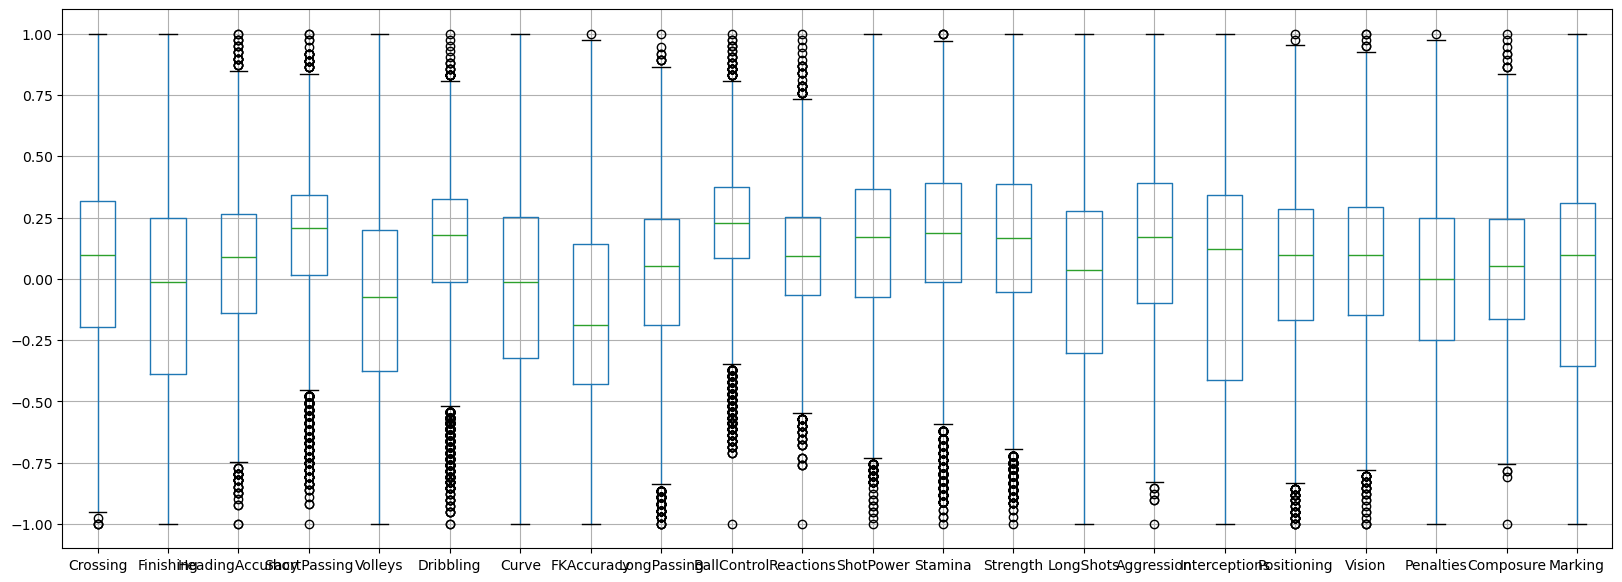

In [76]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

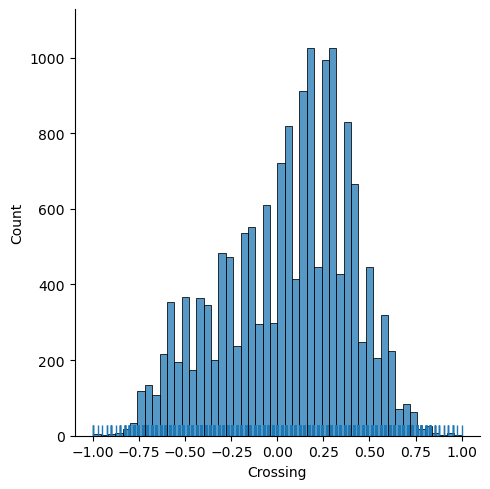

In [79]:
sns.displot(x["Crossing"],kde=False,rug=True)

<Axes: >

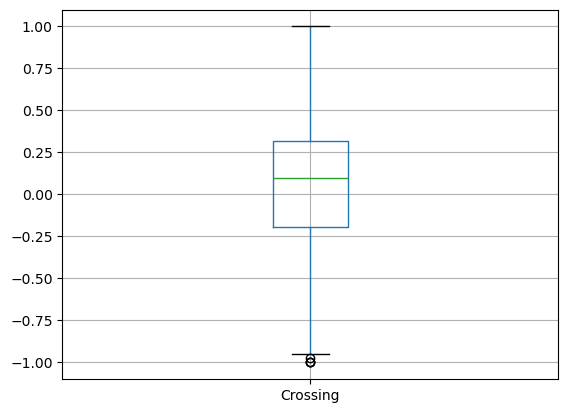

In [81]:
x.boxplot(column=["Crossing"])

In [83]:
x.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
count,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,...,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000,16134.000000
mean,0.053340,-0.064473,0.064777,0.167944,-0.081534,0.122447,-0.030233,-0.132678,0.002395,0.209436,...,0.169028,0.136194,-0.025671,0.135883,-0.014166,0.043232,0.059993,0.003271,0.036376,-0.016546
std,0.344753,0.385366,0.293927,0.268492,0.369591,0.301627,0.365033,0.358858,0.335075,0.241578,...,0.324180,0.350091,0.379045,0.352511,0.458544,0.349506,0.315004,0.312862,0.274302,0.410158
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.195122,-0.388235,-0.139241,0.013699,-0.375000,-0.012048,-0.325301,-0.428571,-0.189189,0.084337,...,-0.014493,-0.055556,-0.301205,-0.097561,-0.414634,-0.166667,-0.146341,-0.250000,-0.162162,-0.357143
50%,0.097561,-0.011765,0.088608,0.205479,-0.075000,0.180723,-0.012048,-0.190476,0.054054,0.228916,...,0.188406,0.166667,0.036145,0.170732,0.121951,0.095238,0.097561,0.000000,0.054054,0.095238
75%,0.317073,0.247059,0.265823,0.342466,0.200000,0.325301,0.253012,0.142857,0.243243,0.373494,...,0.391304,0.388889,0.277108,0.390244,0.341463,0.285714,0.292683,0.250000,0.243243,0.309524
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
x.shape

(16134, 22)

**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [88]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)